# 0.0 Imports

In [1]:
import math
import pandas as pd
import numpy as np
import inflection
#import seaborn as sns

import datetime

from datetime import timedelta
from IPython.display import Image


## 0.1. Helper Functions

## 0.2. Loading Data

In [2]:
# o argumento low_memory fala para função pd.read para ler todo o arquivo de uma só vez
df_sales_row = pd.read_csv('data/train.csv', low_memory=False)
df_store_row = pd.read_csv('data/store.csv', low_memory=False)

#merge
df_raw = pd.merge(df_sales_row, df_store_row, how='left', on ='Store')

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
636813,934,7,2013-12-08,0,0,0,0,0,0,a,c,5460.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


# 1.0 Descrição dos Dados

## 1.1. Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval'] 

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#Rename
df1.columns = cols_new

## 1.2. Data Dimension

In [7]:
print('Number rows: {}'.format(df1.shape[0]))
print('Number cols: {}'.format(df1.shape[1]))

Number rows: 1017209
Number cols: 18


## 1.3. Data Types

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
#competition_distance 
# Ela vai mostrar se na coluna tem NA o "isnan"
# apply aplica a função em todas as linhas

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month

df1['competition_open_since_month']= df1.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year 

df1['competition_open_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)
                               
#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)

#promo2_since_year       

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval  
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map']= df1['date'].dt.month.map(month_map)


df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval']== 0 else 1 if x['month_map']in x['promo_interval'].split(',') else 0 , axis=1)                 


In [12]:
df1.sample(5).T

,330338,482276,164457,357076,284057
store,549,267,553,96,1106
day_of_week,1,5,5,7,2
date,2014-09-22 00:00:00,2014-04-25 00:00:00,2015-03-06 00:00:00,2014-08-24 00:00:00,2014-11-11 00:00:00
sales,4473,6399,7897,0,6052
customers,572,824,673,0,648
open,1,1,1,0,1
promo,0,0,1,0,1
state_holiday,0,0,0,0,0
school_holiday,0,1,0,0,0
store_type,a,c,c,a,a


## 1.6. Change

In [13]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7. Descriptive Statistical

In [15]:
#Separar as variáveis numéricas das categóricas

num_atributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_atributes=df1.select_dtypes(include = ['object'])

### 1.7.1 Numerical Attributes

In [16]:
#Central tendencian - mean, median

ct1 = pd.DataFrame( num_atributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame(num_atributes.apply(np.std)).T
d2 = pd.DataFrame(num_atributes.apply(min)).T
d3 = pd.DataFrame(num_atributes.apply(max)).T
d4 = pd.DataFrame(num_atributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_atributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_atributes.apply(lambda x: x.kurtosis() )).T

#Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.155231,0.0,0.362124,1.904152,1.625796


In [17]:
#sns.displor('sales')

### 1.7.2 Categorical Attributes

In [18]:
cat_atributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [19]:
# Faço com o boxplot

In [20]:
# Fenômeno
# É aquilo que você está tentando medir ou modelar
# Qual o fenômeno você está tentando modelar?

# Agentes
# Quem são os agentes atuam sobre o fenômeno de interesse?

#Atributos dos agentes
# Qual a descrição dos Agentes?

#Lista  de Hipóteses:
#Hipóteses para validar com os dados?

#Como escrever hipóteses?

# 2.0 Feature Engineering

## 2.1  Mapa das Hipóteses

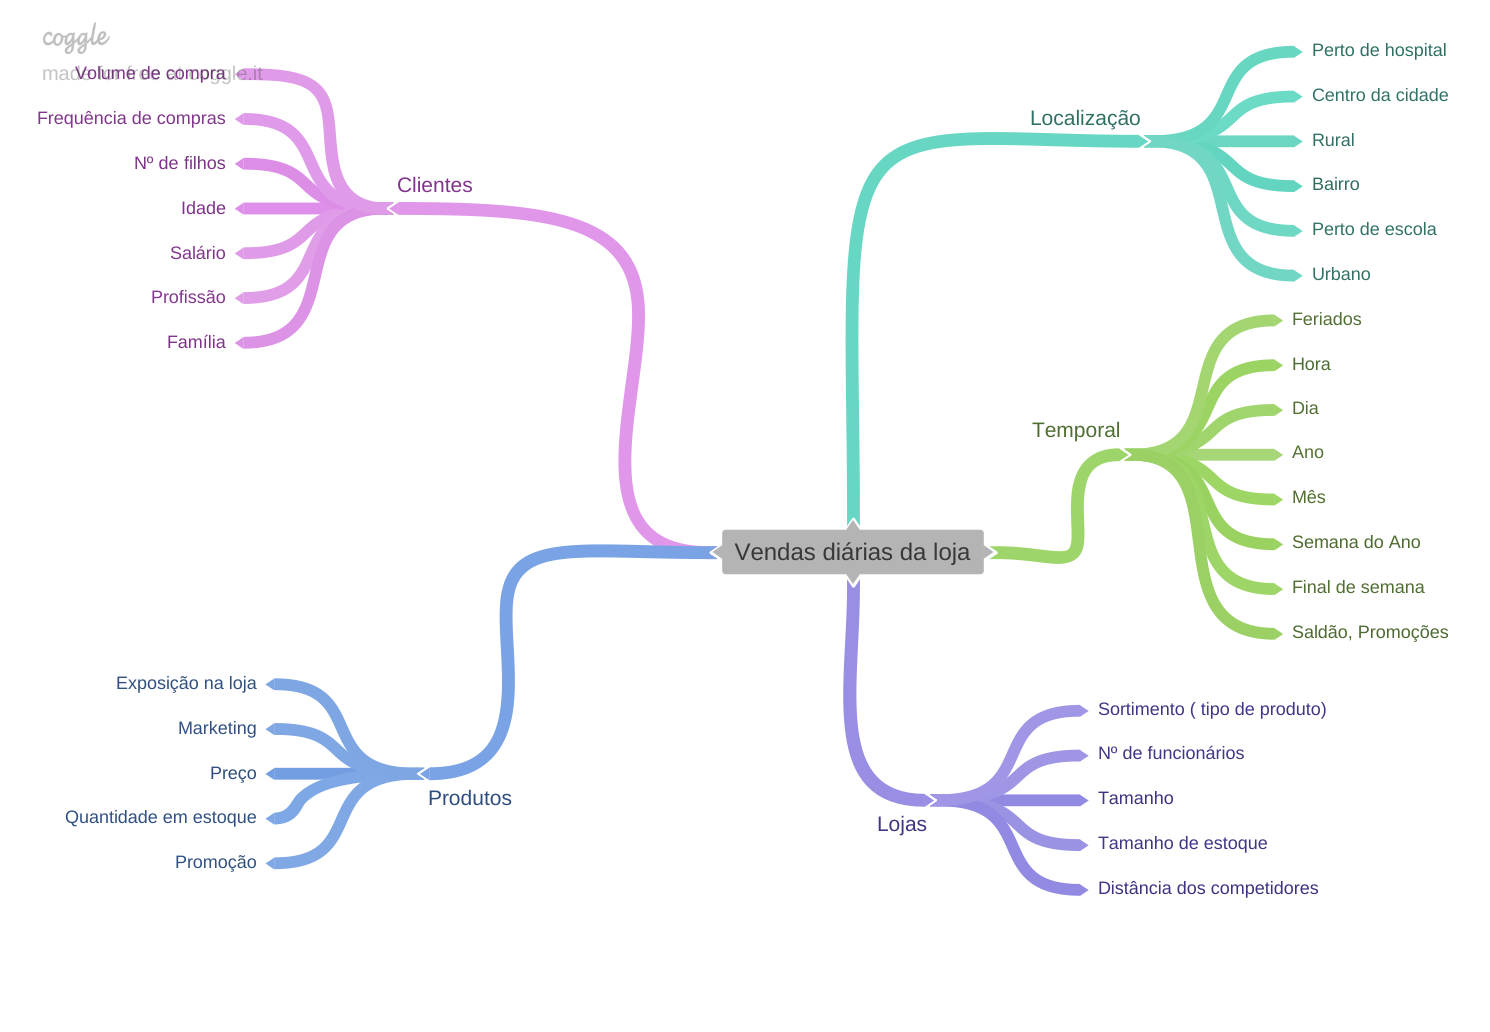

In [21]:
Image('img/MindMapHypothesis.png')

## 2.2 Criação das Hipóteses

### 2.2.1 Hipóteses das Lojas

**1-** Lojas com maior número de funcionários deveriam vender mais.

**2-** Lojas com maior capacidade de estoque deveriam vender mais.

**3-** Lojas com maior porte deveriam vender mais.

**4-** Lojas com competidores mais próximos deveriam vender menos.

**5-** Lojas com maior sortimento deveriam vender mais.

**6-** Lojas com competidores à mais tempo  deveriam vender mais.

### 2.2.2 Hipóteses dos Produtos

**1-** Lojas que investem mais em Marketing deveriam vender mais.

**2-** Lojas com maior exposição de produtos deveriam vender mais.

**3-** Lojas com produtos com preço menor deveriam vender mais.

**4-** Lojas com promoções mais agressivas(descontos maiores), deveriam vender mais.

**5-** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6-** Lojas com mais dias de promoção deveriam vender mais.

**7-** Lojas com mais promoções consecutivas deveriam vender mais.


### 2.2.3 Hipóteses de Tempo

**1-** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2-** Lojas deveriam vender mais ao longo dos anos

**3-** Lojas deveriam vender mais no segundo semestre do ano.

**4-** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5-** Lojas deveriam vender menos aos finais de semana.

**6-** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Hipóteses Finais

- Loja

**1-** Lojas com competidores mais próximos deveriam vender menos.

**2-** Lojas com maior sortimento deveriam vender mais.

**3-** Lojas com competidores à mais tempo  deveriam vender mais.

- Produtos

**4-** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5-** Lojas com mais dias de promoção deveriam vender mais.

**6-** Lojas com mais promoções consecutivas deveriam vender mais.

- Tempo

**7-** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8-** Lojas deveriam vender mais ao longo dos anos

**9-** Lojas deveriam vender mais no segundo semestre do ano.

**10-** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11-** Lojas deveriam vender menos aos finais de semana.

**12-** Lojas deveriam vender menos durante os feriados escolares.


## 2.4 Feature Engineering

In [22]:
df2 = df1.copy()

In [23]:
#year 

df2['year'] = df2['date'].dt.year

#month

df2['month'] = df2['date'].dt.month

#day

df2['day'] = df2['date'].dt.day

#week of year

df2['week_of_year'] = df2['date'].dt.weekofyear

#year week

df2['year_week'] = df2['date'].dt.strftime( '%Y-%W')


#competition of since

df2['competition_since']= df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1), axis=1)

df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

#promo since

df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since']= df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w')- datetime.timedelta( days=7 ))



df2['promo_since_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment

df2['assortment'] =df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')


# state holiday

df2['state_holiday_new'] = df2['state_holiday'].apply(lambda x: 'public holiday' if x == 'a' else 'Easter holiday' if x == 'b' else 'Christmas' if x =='c' else 'regular_day')



C:\Users\bruna\anaconda3\envs\DataScienceEmProducao\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [24]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [ ]:
#Filtragem de variáveis:
# Restrições de Acordo com o Negócio

#Seleção de Variáveis:
#-Variáveis mais relevantes para o modelo

# 3.0 Variable Filtering

In [25]:
df3 = df2.copy()

In [27]:
df3.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## 3.1 Rows Filtering

In [31]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Selection Columns

In [35]:
col_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop(col_drop, axis = 1)

In [36]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_since_week',
       'state_holiday_new'],
      dtype='object')